# Beautiful Soup and HTML

## Introduction

The web is full of great datasets, but not all of them are readily available for download and analysis. Today we'll take a look at how you can surf the web robotically, saving the relevant information into storage containers as you go!

We'll be taking a look at two main packages:

* **Beautiful Soup**
* **Pandas**

Our general approach will be:

1. Pick a domain/set of web pages to scrape
2. Investigate those web pages using the developers tools from your web browser (such as Chrome or Firefox)
3. Write rules to select the relevant objects from the DOM
4. Parse information from those objects and store it in a container

## Libraries Used

In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import plotly.offline as p
import plotly.graph_objs as go

p.init_notebook_mode(connected=True)
from IPython.display import Image

## Web Page Introduction: The DOM + HTML


Before we start scraping, having a little background about how web pages are formatted is very helpful.

"The **Document Object Model** (**DOM**) is a **programming interface** for **HTML** (remember **HTML** from Tuesday) and **XML** documents. It represents the page so that programs can change the document structure, style, and content. The DOM represents the document as nodes and objects. That way, programming languages can connect to the page." Amongst other things, this allows programming languages such as javascript to interactively change the page and HTML!

** What you'll see is the **DOM** and **HTML** create a **hierarchy** of **elements** (much like we saw with the **JSON** files with its nested dictionaries). This structure and the underlying elements can be ***naviagated*** similar to a **family tree**, which is one of **BeautifulSoup**'s main mechanisms for naviagation. Once you select a specific element within a page you can then ***navigate*** to successive elements using methods such as sibling, parent, or descendents.**

To learn more about the DOM see:

https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction

In [6]:
#Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/DOM-model.png')


## HTML

**HTML** stands for **H**yper **T**ext **M**arkup **L**anguage and it the standard **markup language** for the web.

## Beautiful Soup

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

**BeautifulSoup** is a Python library designed for quick turnaround projects like SCREEN-SCRAPING. Three features make it powerful:

1. **BeautifulSoup** provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a **parse tree**: a toolkit for dissecting a document and extracting what you need. It doesn't take much code to write an application

2. **BeautifulSoup** automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and **BeautifulSoup** can't detect one. Then you just have to specify the original encoding. (An encoding 

3. **BeautifulSoup** sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.

**BeautifulSoup** parses anything you give it, and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text."

## Example Webpage with an Example HTML

https://www.pythonforbeginners.com/files/with-statement-in-python

In Python you need to give access to a file by **opening** it. You can do it by using
the **open()** function. Open returns a file object, which has methods and attributes
for getting information about and manipulating the opened file. 

With the **with** statement, you get **better syntax and exceptions handling**. 

"The **with** statement simplifies exception handling by encapsulating common
preparation and cleanup tasks."

In addition, it will **automatically close the file**. The with statement provides
a way for ensuring that a clean-up is always used.

In [9]:
html = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/sample_page.html'
with open(html) as tag_soup:
    beautsoup_object = BeautifulSoup(tag_soup, 'html.parser')
print(beautsoup_object.prettify())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/sample_page.html'

## Extracting Pieces of the HTML

### Here's a few of **BeautifulSoup**'s most commonly used Attributes and Methods

#### Gives us all of the title's components

In [8]:
print(beautsoup_object.title)

NameError: name 'beautsoup_object' is not defined

#### Gives us the name of title's title

In [24]:
print(beautsoup_object.title.name)


title


#### Gives us the name of title we'd see

In [ ]:
print(beautsoup_object.title.string)


#### Gives us the title's 'parent name' (one rung up in the hierarchy)

In [26]:
print(beautsoup_object.title.parent.name)


head


#### Gives us the part of the HTML code that starts with the first 'p', terminating at '/ p'

In [30]:
print(beautsoup_object.p)


<p class="title">
<b>
     The Dormouse's story
    </b>
</p>


#### Gives us the part of the HTML code that starts with class from 'p'

In [32]:
print(beautsoup_object.p['class'])


['title']


#### Gives us the first part of the HTML code that starts with the first 'a', terminating at '/ a'

In [33]:
print(beautsoup_object.a)


<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>


#### What if I don't want just the first one? What if I want the content of all of them?

In [34]:
print(beautsoup_object.find_all('a'))


[<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>, <a class="sister" href="http://example.com/lacie" id="link2">
     Lacie
    </a>, <a class="sister" href="http://example.com/tillie" id="link2">
     Tillie
    </a>]


#### What if now I'd like to be a bit more specific? I only want that of 'link2'

In [37]:
print(beautsoup_object.find(id = "link2"))


<a class="sister" href="http://example.com/tillie" id="link2">
     Tillie
    </a>


## Quick Question

That only gave me the first link, though. I want the second. How do you guys think we go about getting it? Try out a few different methods for yourself.

In [ ]:
print(beautsoup_object.find(href="http://example.com/tillie", id = "link2"))


## Getting a Webpage's Content

#### Make a get request to retrieve the HTML page (and thus get a response)

Let's look back at the website A-Z Lyrics HTML. Using BeautifulSoup, we'll try and clean it up.

This first command will package the request to the URL, send the request and catch the response to our *response* variable. This extracts the response. We can consider **tag soup** to be the *raw* HTML we saw the other day.

In [67]:
url = 'https://www.azlyrics.com/'

response = requests.get(url) # Our RESPONSE
tag_soup = response.text
#print(tag_soup)

In [68]:
url1 = 'https://www.azlyrics.com/l/lilyallen.html'

response1 = requests.get(url1) # Our RESPONSE
tag_soup1 = response1.text
print(tag_soup1)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<meta name="description" content="Lily Allen lyrics - 82 song lyrics sorted by album, including &quot;Somewhere Only We Know&quot;, &quot;Fuck You (Very Much)&quot;, &quot;Lost My Mind&quot;."> 
<meta name="keywords" content="Lily Allen, Lily Allen lyrics, discography, albums, songs">
<meta name="robots" content="noarchive">
<title>Lily Allen Lyrics</title>

<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css">
<link rel="stylesheet" href="//www.azlyrics.com/bsaz.css">

<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></s

It isn't until we use the **BeautifulSoup** module and the method **prettify()** that our HTML page is coherent:

#### Pass the page contents to BeautifulSoup for parsing

In [33]:
beautsoup_object = BeautifulSoup(response.content, 'html.parser') 
print(beautsoup_object)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="noarchive" name="robots"/>
<meta content="AZLyrics" name="name"/>
<meta content="lyrics,music,song lyrics,songs,paroles" name="keywords"/>
<base href="//www.azlyrics.com"/>
<script src="//www.azlyrics.com/external.js" type="text/javascript"></script>
<title>AZLyrics - Song Lyrics from A to Z</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif]-->
<script type="text/javascript">
    <!-- 


In [76]:
beautsoup_object1 = BeautifulSoup(response1.content, 'html.parser') 
print(beautsoup_object1)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<meta content='Lily Allen lyrics - 82 song lyrics sorted by album, including "Somewhere Only We Know", "Fuck You (Very Much)", "Lost My Mind".' name="description"/>
<meta content="Lily Allen, Lily Allen lyrics, discography, albums, songs" name="keywords"/>
<meta content="noarchive" name="robots"/>
<title>Lily Allen Lyrics</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
<script src="http

This object is referred to in Python as a **BeautifulSoup** object.

In [13]:
beautsoup_object = BeautifulSoup(tag_soup)
type(beautsoup_object)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




bs4.BeautifulSoup

To clean the 'BeautifulSoup' object up further, we use the **prettify()** method.

In [34]:
html_page = beautsoup_object.prettify()[:1000]
print(html_page)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="noarchive" name="robots"/>
  <meta content="AZLyrics" name="name"/>
  <meta content="lyrics,music,song lyrics,songs,paroles" name="keywords"/>
  <base href="//www.azlyrics.com"/>
  <script src="//www.azlyrics.com/external.js" type="text/javascript">
  </script>
  <title>
   AZLyrics - Song Lyrics from A to Z
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif]-->
  <


In [77]:
html_page1 = beautsoup_object1.prettify()[:1000]
print(html_page1)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content='Lily Allen lyrics - 82 song lyrics sorted by album, including "Somewhere Only We Know", "Fuck You (Very Much)", "Lost My Mind".' name="description"/>
  <meta content="Lily Allen, Lily Allen lyrics, discography, albums, songs" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <title>
   Lily Allen Lyrics
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min


## DOM Parsing –– Class Exercise

### Inspecting the Web Page for Relevant Elements


Here's the page itself:

In [37]:
#Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/a_z_home_page.png')


### Parsing the DOM

#### beautsoup_object.findAll()

One common method we'll be use to navigate through the web page to extract information of interest is the beautsoup_object**.findAll()** method.

#### Here's the docstring which you can bring up by typing (soup.findAll? [shift+enter])

soup.findAll(name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)

**Docstring**: Extracts a list of Tag objects that match the given criteria. You can specify the name of the Tag and any attributes you want the Tag to have.

The value of a key-value pair in the 'attrs' map can be a string, a list of strings, a regular expression object, or a callable that takes a string and returns whether or not the string matches for some custom definition of 'matches'. The same is true of the tag name.

In [70]:
#Get all the hyperlinks on a page
links = beautsoup_object1.findAll('a')
links

[<a class="navbar-brand" href="//www.azlyrics.com"><img alt="AZLyrics.com" class="pull-left" src="//www.azlyrics.com/az_logo_tr.png" style="max-height:40px; margin-top:-10px;"/></a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/a.html">A</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/b.html">B</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/c.html">C</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/d.html">D</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/e.html">E</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/f.html">F</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/g.html">G</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/h.html">H</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/i.html">I</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/j.html">J</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/k.html">K</a>,
 <a class="btn btn-menu" href="//www.azlyrics.com/l.html">L</a>,
 <a class="btn btn-menu" href="//www.

### Lets pull one of the link pages and see what we can get!

**Notice that these are relative links that all refer to pages and subdirectories within the azlyrics domain.** We'll have to be sure to account for this when pulling successive pages.

In [78]:
links = beautsoup_object1.findAll('a')

link = links[35] # 35th link

url_base = 'https://www.azlyrics.com/l/lilyallen.html'
url_ext = link.get('href')


In [79]:
links = beautsoup_object1.findAll('a')

link = links[35]
url_ext = link.get('href')
url_ext

'../lyrics/lilyallen/notbig.html'

In [82]:
html_page1 = requests.get(url_base + url_ext)
soup = BeautifulSoup(html_page1.content, 'html.parser')

print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="noarchive" name="robots"/>
  <meta content="AZLyrics" name="name"/>
  <meta content="lyrics,music,song lyrics,songs,paroles" name="keywords"/>
  <base href="//www.azlyrics.com"/>
  <script src="//www.azlyrics.com/external.js" type="text/javascript">
  </script>
  <title>
   AZLyrics - Song Lyrics from A to Z
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif]-->
  <


## More parsing!


Here's what the page looks like in a web browser:



In [96]:
#Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/artist_page.png')


Now let's retrieve a list of the song pages as well as their assosciated albums!

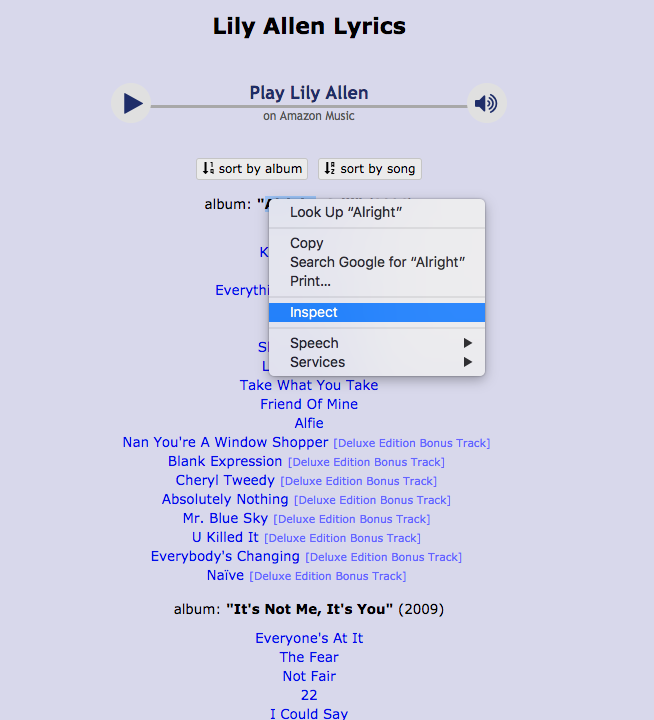

In [97]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/artist_inspect.png')


We want something more specific so let's look at the page itself. Right click (windows)/ option + click (mac) on one of the album titles and go to inspect.

You should see something like this: 

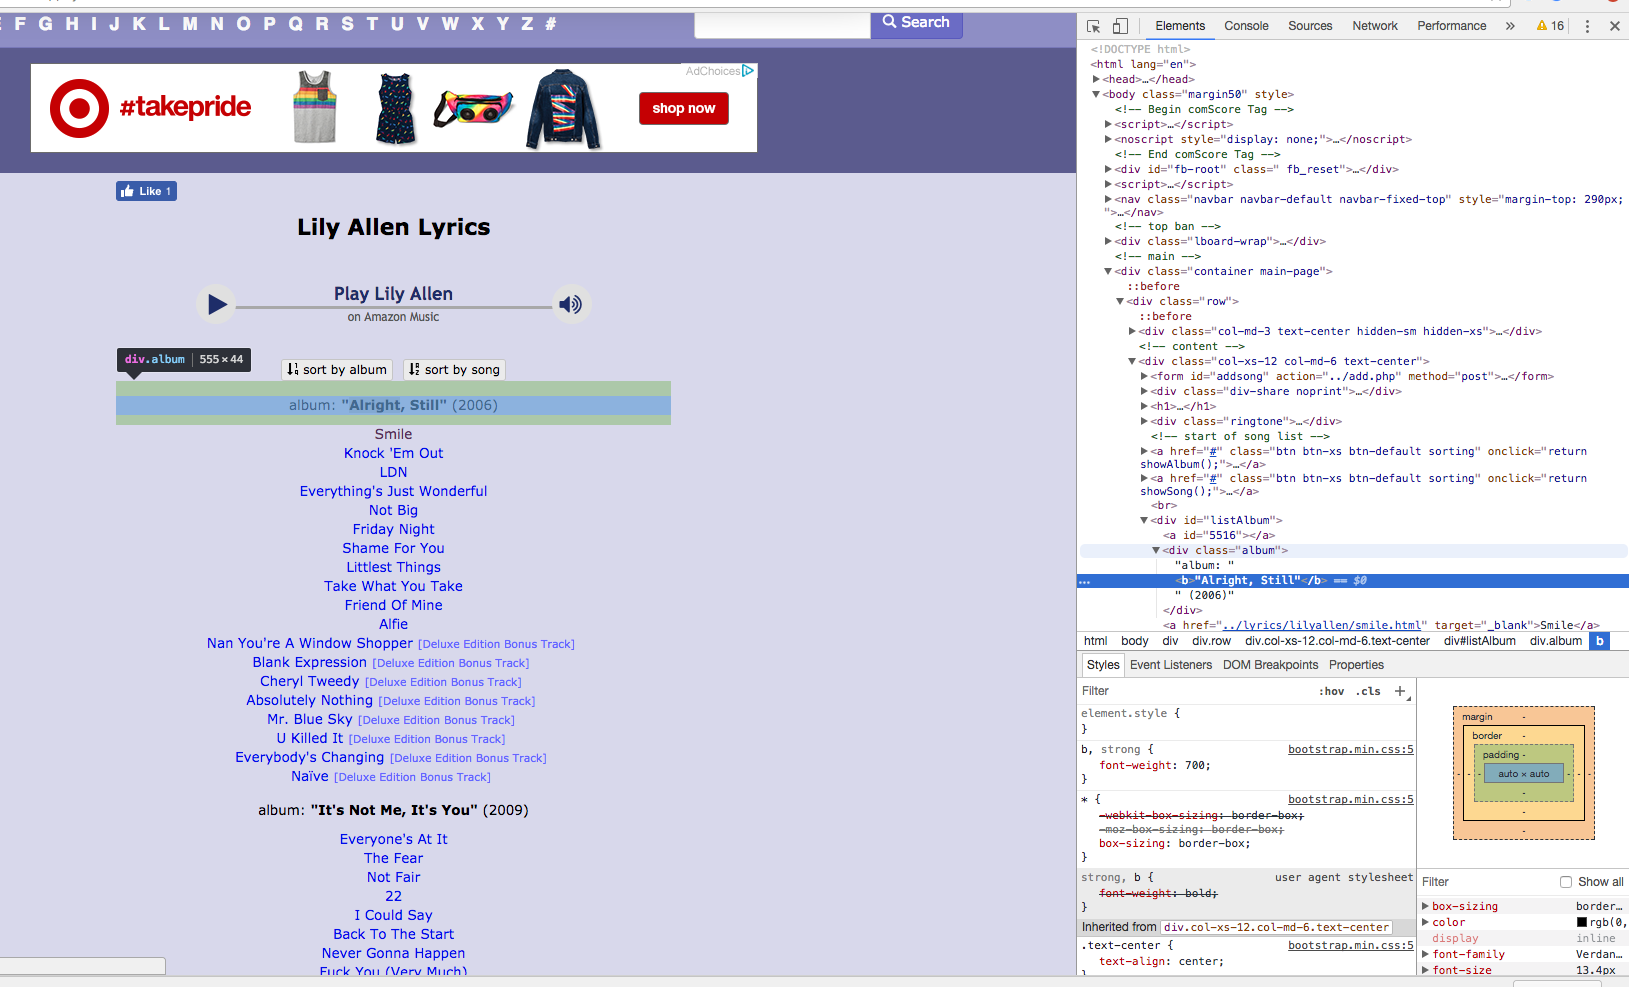

In [98]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/artist_inspect_detailed.png')


Look at the details for the album header:


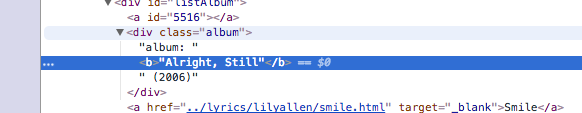

In [99]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/inspect_div_detailed.png')


It's a div container called 'album'! Let's use this to select the various albums from the page.

In [83]:
albums = beautsoup_object1.find_all("div", class_="album")
print('Number of matches: {}'.format(len(albums)))
print('Object type: {}'.format(type(albums)))
print('Preview of objects:\n{}'.format(albums[:2]))

Number of matches: 5
Object type: <class 'bs4.element.ResultSet'>
Preview of objects:
[<div class="album">album: <b>"Alright, Still"</b> (2006)</div>, <div class="album">album: <b>"It's Not Me, It's You"</b> (2009)</div>]


In [84]:
print(beautsoup_object1)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<meta content='Lily Allen lyrics - 82 song lyrics sorted by album, including "Somewhere Only We Know", "Fuck You (Very Much)", "Lost My Mind".' name="description"/>
<meta content="Lily Allen, Lily Allen lyrics, discography, albums, songs" name="keywords"/>
<meta content="noarchive" name="robots"/>
<title>Lily Allen Lyrics</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
<script src="http

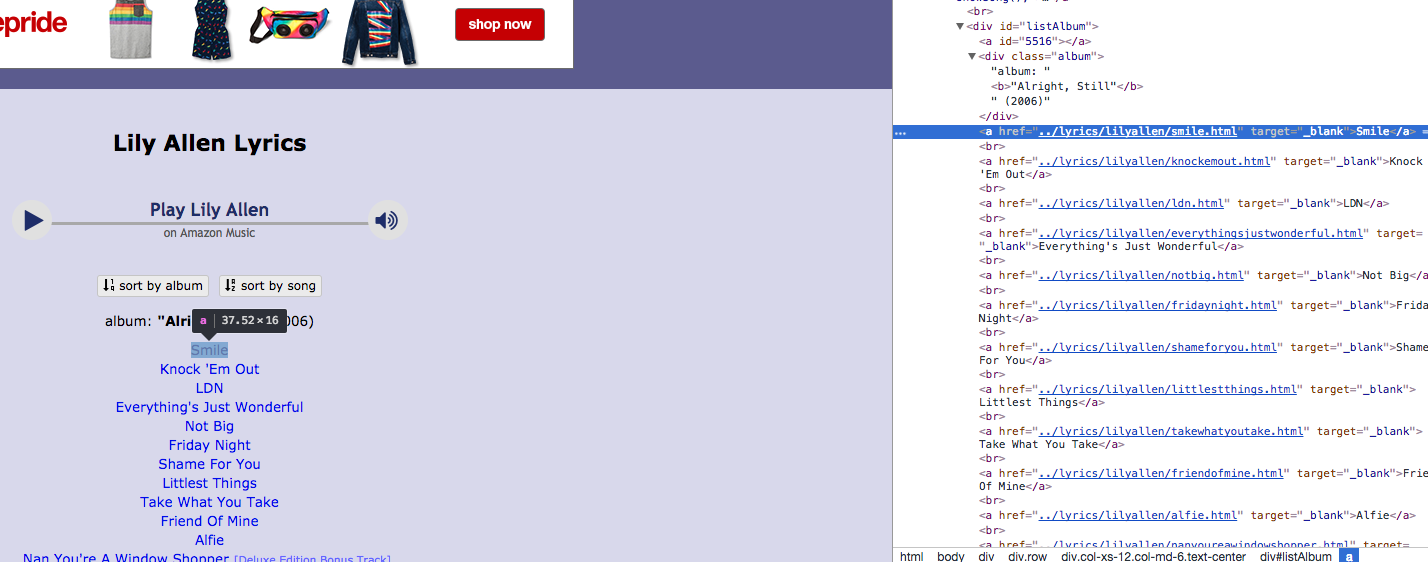

In [91]:
#Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/artist_song_inspect.png')


## Navigating the DOM Hierarchy –– Need to fix what's above first


Notice that under each of these album DIVs there are links for each of the songs.
These links aren't children of the div object in the page's structure (they could be but that's not how this website structured them.) Instead, they are siblings to the div element.

### Pulling out the Song Titles and Pages


Let's start by taking a look at all of the hyperlinked siblings of the first album we found.

In [85]:
album = albums[0]
album.findNextSiblings('a')

[<a href="../lyrics/lilyallen/smile.html" target="_blank">Smile</a>,
 <a href="../lyrics/lilyallen/knockemout.html" target="_blank">Knock 'Em Out</a>,
 <a href="../lyrics/lilyallen/ldn.html" target="_blank">LDN</a>,
 <a href="../lyrics/lilyallen/everythingsjustwonderful.html" target="_blank">Everything's Just Wonderful</a>,
 <a href="../lyrics/lilyallen/notbig.html" target="_blank">Not Big</a>,
 <a href="../lyrics/lilyallen/fridaynight.html" target="_blank">Friday Night</a>,
 <a href="../lyrics/lilyallen/shameforyou.html" target="_blank">Shame For You</a>,
 <a href="../lyrics/lilyallen/littlestthings.html" target="_blank">Littlest Things</a>,
 <a href="../lyrics/lilyallen/takewhatyoutake.html" target="_blank">Take What You Take</a>,
 <a href="../lyrics/lilyallen/friendofmine.html" target="_blank">Friend Of Mine</a>,
 <a href="../lyrics/lilyallen/alfie.html" target="_blank">Alfie</a>,
 <a href="../lyrics/lilyallen/nanyoureawindowshopper.html" target="_blank">Nan You're A Window Shopper<

See anything we can use to seperate the songs out by album?!

One option is those "id" tags...the web page appears to be structured to have one of these at the end of a song list for a particular album.

A second option would be to look at all of the previous song titles from the next album. Then all of the songs that were both after the first album and before the second album would be those that we're after!

To be difficult, I'll choose the second method to demonstrate. I'll leave the other option for you as a challenge to practice on.

This should also show you that web scraping can be messy, interactive and explorative; its often a process of analyzing a page, finding structure that you can leverage and iterating to retrieve the information you're after.

In [107]:
#for album_n, val in enumerate(albums):

data = [] #Create storage container 
for album_n in range(len(albums)): 


#data = [] #Create a storage container
#for album_n in range(len(albums)): # We use range(len()) when we need to work with indices
                                   # of a sequence. It ranges over the index values rather
                                   # than the actual values themselves
    #On the last album, we won't be able to look forward
    if album_n == len(albums)-1:
        cur_album = albums[album_n]
        album_songs = cur_album.findNextSiblings('a')
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
    else:
        cur_album = albums[album_n]
        next_album = albums[album_n+1]
        saca = cur_album.findNextSiblings('a') #songs after current album
        sbna = next_album.findPreviousSiblings('a') #songs before next album
        album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
data[:2]
for title, page, album, in data:
    print(album)

album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "Alright, Still" (2006)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)
album: "It's Not Me, It's You" (2009)


In [108]:
print(len(data), len(data[0]))


85 3


### Storing Elements


Let's start to clean everything up. To start let's create a Pandas DataFrame; a spreadsheet object similar to those from Microsoft Excel.

In [111]:
data = pd.DataFrame(data) #Create a DataFrame from the data
print(len(data)) #See how long the dataset is (number of rows)
data.columns = ['Song', 'Url_ext', 'Album']
data.head(80) #Preview the DataFrame (default is first 5 rows) 

85


,Song,Url_ext,Album
0,Smile,../lyrics/lilyallen/smile.html,"album: ""Alright, Still"" (2006)"
1,Knock 'Em Out,../lyrics/lilyallen/knockemout.html,"album: ""Alright, Still"" (2006)"
2,LDN,../lyrics/lilyallen/ldn.html,"album: ""Alright, Still"" (2006)"
3,Everything's Just Wonderful,../lyrics/lilyallen/everythingsjustwonderful.html,"album: ""Alright, Still"" (2006)"
4,Not Big,../lyrics/lilyallen/notbig.html,"album: ""Alright, Still"" (2006)"
5,Friday Night,../lyrics/lilyallen/fridaynight.html,"album: ""Alright, Still"" (2006)"
6,Shame For You,../lyrics/lilyallen/shameforyou.html,"album: ""Alright, Still"" (2006)"
7,Littlest Things,../lyrics/lilyallen/littlestthings.html,"album: ""Alright, Still"" (2006)"
8,Take What You Take,../lyrics/lilyallen/takewhatyoutake.html,"album: ""Alright, Still"" (2006)"
9,Friend Of Mine,../lyrics/lilyallen/friendofmine.html,"album: ""Alright, Still"" (2006)"


### Cleaning Elements


Here's where your knowledge of string methods will come in super handy! You can also use more complex selection rules with Regular Expressions using the re package. See https://docs.python.org/3/library/re.html for more details!

In [112]:
data['Album'] = data['Album'].map(lambda x: x.strip('album:')) #remove the initial "album:". Hopefully none of the actual names contain that!!
data.head() #Preview updated results

,Song,Url_ext,Album
0,Smile,../lyrics/lilyallen/smile.html,"""Alright, Still"" (2006)"
1,Knock 'Em Out,../lyrics/lilyallen/knockemout.html,"""Alright, Still"" (2006)"
2,LDN,../lyrics/lilyallen/ldn.html,"""Alright, Still"" (2006)"
3,Everything's Just Wonderful,../lyrics/lilyallen/everythingsjustwonderful.html,"""Alright, Still"" (2006)"
4,Not Big,../lyrics/lilyallen/notbig.html,"""Alright, Still"" (2006)"


***Rem.***: the **map()** function returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [ ]:
def extract_year(album_title):
    try:
        return re.findall('[(](\d\d\d\d)[)]', album_title)[0]
    # \d matches [0-9] and other digit characters. For example, Eastern Arabic 
    # numerals ٠١٢٣٤٥٦٧٨٩
    except:
        return 'Unknown'
df['Year'] = df['Album'].map(extract_year)
df.head()

## Visualizing Results –– Exercise


Let's make a barplot with the data we have.

## More Practice –– Extracting Text

What if all we wanted was the **text** of some website. Below I've included a URL of a blog post written in 2006. It's on mathematics in economics and John Maynard Keynes' economics professor, Alred Marshall, view on the matter.

In [18]:
url = 'http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html'

response = requests.get(url)
tag_soup = response.text
beautsoup_object = BeautifulSoup(tag_soup)
html_page = beautsoup_object.prettify()

print(html_page)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html http:="" id="sixapart-standard" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="xmlns:fb=">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="http://www.typepad.com/" name="generator"/>
  <meta content="There is a discussion in the comments to the post about economists writing for general audiences about the role of mathematics in economics and how it dominates professional training, undermines communication with more general audiences, and so on. In 1906..." name="description"/>
  <!-- -->
  <link href="http://economistsview.typepad.com/economistsview/styles.css" rel="stylesheet" type="text/css"/>
  <link href="http://economistsview.typepad.com/economistsview/atom.xml" rel="alternate" title="Atom" type="application/atom+xml"/>
  <link href="http://economistsview.typepad.com/economistsview/index.rdf" rel="alternate"

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




Say we want the **title** of the webpage. We would use:

In [19]:
page_title = beautsoup_object.title
print(page_title)

<title>Economist's View: Alfred Marshall on Mathematics in Economics</title>


What if instead we wanted the **text**? We'd use the **get_text()** method.

In [20]:
page_text = beautsoup_object.get_text()
print(page_text)














Economist's View: Alfred Marshall on Mathematics in Economics



















Economist's View









« Cross-Country Relationship Between Wage and Price Inflation |
		Main
		| Does the Shoe Finally Fit? »


Friday, May 05, 2006

Alfred Marshall on Mathematics in Economics


There is a discussion in the comments to the post about economists writing for general audiences about the role of mathematics in 
economics and how it dominates professional training, undermines communication 
with more general audiences, and so on. 

In 1906 Alfred Marshall wrote about his skepticism regarding the use of 
mathematics in economics1:
[I had] a growing feeling in the later years of my work at the subject that a 
good mathematical theorem dealing with economic hypotheses was very unlikely to 
be good economics: and I went more and more on the rules - (1) Use mathematics 
as a shorthand language, rather than an engine of inquiry. (2) Keep to them till 
you have done. (3) Translate in

## More practice –– Extracting Hyperlinks

What if rather than the website's **text**, we wanted its **hyperlinks**. For this example, think if we wanted to get any sort of citations or footnotes in the form of their **hyperlinks**.

**Hyperlinks** are defined by the ***< a >*** **HTML** tag. We'd like to **find all** ***< a >*** tags, and so, as one might expect, we use the **find_all()** method

In [24]:
a_hyp_tags = beautsoup_object.find_all('a') # Note what we're looking for
type(a_hyp_tags)
print(a_hyp_tags)

[<a href="http://economistsview.typepad.com/economistsview/"></a>, <a accesskey="1" href="http://economistsview.typepad.com/economistsview/">Economist's View</a>, <a href="http://economistsview.typepad.com/economistsview/2006/05/crosscountry_re.html">« Cross-Country Relationship Between Wage and Price Inflation</a>, <a href="http://economistsview.typepad.com/economistsview/">Main</a>, <a href="http://economistsview.typepad.com/economistsview/2006/05/does_the_shoe_f.html">Does the Shoe Finally Fit? »</a>, <a href="http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html" style="color: #000000; text-decoration:none">Alfred Marshall on Mathematics in Economics</a>, <a href="http://economistsview.typepad.com/economistsview/2006/05/why_no_one_care.html">writing for general audiences</a>, <a href="http://profile.typepad.com/markthoma" rel="author" style="text-decoration:none;color: #666666;">Mark Thoma</a>, <a href="http://economistsview.typepad.com/economistsview/econom

**a_hyp_tags** is a ResultSet. In order to print the extracted hyperlink's URLs, we'll have to iterate over it using a **for loop**. **Hyperlinks** require the **href** property, because it specifies a location. 

In [63]:
for hyplink in a_hyp_tags:
    print(hyplink.get('href'))

http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/2006/05/crosscountry_re.html
http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/2006/05/does_the_shoe_f.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/why_no_one_care.html
http://profile.typepad.com/markthoma
http://economistsview.typepad.com/economistsview/economics/
http://economistsview.typepad.com/economistsview/history_of_thought/
http://economistsview.typepad.com/economistsview/methodology/
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html#trackback
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html#comments
None
None
None
None
None
None
None
None
http://economists

## Quick Question

What if I only wanted the first 3 **hyperlinks**? How would I go about writing that for loop?

In [29]:
for hyplink in a_hyp_tags[:3]:
    print(hyplink.get('href'))

http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/2006/05/crosscountry_re.html


"SWBAT:
--Understand the basic structure of a webpage/DOM
--Scrape a webpage using industry-standard tools (BeautifulSoup)
--Store and manipulate data 



Lesson:

- HTML, CSS selectors
- BeautifulSoup"

## Quick Question

Having written the **for-loop** below, how would I have had to have defined **a_hyp_tags**?

In [30]:
for hyplink in a_hyp_tags:
    print(hyplink.get('href'))

http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/2006/05/crosscountry_re.html
http://economistsview.typepad.com/economistsview/
http://economistsview.typepad.com/economistsview/2006/05/does_the_shoe_f.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/why_no_one_care.html
http://profile.typepad.com/markthoma
http://economistsview.typepad.com/economistsview/economics/
http://economistsview.typepad.com/economistsview/history_of_thought/
http://economistsview.typepad.com/economistsview/methodology/
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html#trackback
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html#comments
None
None
None
None
None
None
None
None
http://economists

In [ ]:
a_hyp_tags = beautsoup_object.find_all('a') # Note what we're looking for


## Quick Question

What if I only wanted the 5th through the 9th hyperlinks?

In [26]:
for hyplink in a_hyp_tags[4:8]:
    print(hyplink.get('href'))

http://economistsview.typepad.com/economistsview/2006/05/does_the_shoe_f.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/why_no_one_care.html
http://profile.typepad.com/markthoma


In [64]:
for hyplink in a_hyp_tags[4:9]:
    print(hyplink.get('href'))

http://economistsview.typepad.com/economistsview/2006/05/does_the_shoe_f.html
http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html
http://economistsview.typepad.com/economistsview/2006/05/why_no_one_care.html
http://profile.typepad.com/markthoma
http://economistsview.typepad.com/economistsview/economics/


## Further Resources


**BeatifulSoup**: a good go to tool for parsing the DOM
https://www.crummy.com/software/BeautifulSoup/?

**Selenium**: Browser automation (useful when you need to interact with javascript for more complex scraping)
https://www.seleniumhq.org/

**Scrapy**: another package for scraping larger datasets at scale
https://scrapy.org/

## Pivot Tables

The name Pandas is derived from ‘panel’ and ‘data’. I include this here because, while you haven't seen panel data yet, you will see that it makes up most real world datasets. It is the combination of time series and cross-sectional data set types.

We're going to talk about pivot tables here because I want you guys to leave class with something you can use in your day to day *immediately*. I think that so long as you have that you'll continue to use Python, and so long as you continue to use Python the more likely you are to move on to the cooler stuff we'll cover later in the course.

In [118]:
data_funnel = pd.read_csv("./Sales-funnel.csv")
data_funnel.head()


,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [119]:
data_funnel.groupby('Name')[['Quantity']].mean().head()


,Quantity
Name,
Barton LLC,1.0
"Fritsch, Russel and Anderson",1.0
Herman LLC,2.0
Jerde-Hilpert,2.0
"Kassulke, Ondricka and Metz",3.0


In [120]:
data_funnel.groupby('Name')[['Price']].mean().head()


,Price
Name,
Barton LLC,35000
"Fritsch, Russel and Anderson",35000
Herman LLC,65000
Jerde-Hilpert,5000
"Kassulke, Ondricka and Metz",7000


In [121]:
data_funnel.groupby('Product')[['Price']].mean().head()


,Price
Product,
CPU,51666.666667
Maintenance,5500.000000
Monitor,5000.000000
Software,10000.000000


Here, we're doing a few things. We **groupby** Product and Rep, we **select** 'Quantity', and we **apply** use the **unstack** function. 

In [122]:
data_funnel.groupby(['Product', 'Rep'])['Quantity'].aggregate('sum').unstack()


Rep,Cedric Moss,Craig Booker,Daniel Hilton,John Smith,Wendy Yule
Product,,,,,
CPU,3.0,2.0,4.0,1.0,7.0
Maintenance,1.0,2.0,NaN,2.0,3.0
Monitor,NaN,NaN,NaN,NaN,2.0
Software,1.0,1.0,1.0,NaN,NaN


## Pivot Table Syntax

See that it's the same as above.

In [123]:
data_funnel.pivot_table('Quantity', index='Product', columns='Rep')


Rep,Cedric Moss,Craig Booker,Daniel Hilton,John Smith,Wendy Yule
Product,,,,,
CPU,1.5,1.0,2.0,1.0,3.5
Maintenance,1.0,2.0,NaN,2.0,3.0
Monitor,NaN,NaN,NaN,NaN,2.0
Software,1.0,1.0,1.0,NaN,NaN


## Multi-level Pivot Tables

Just as in the **GroupBy**, the grouping in pivot tables can be specified with **multiple levels**, and via a number of options. For example, we might be interested in looking at age as a third dimension. We'll bin the age using the pd.**cut()** function:

In [125]:
age = pd.cut(data_funnel['Price'], [20000, 50000, 80000])
data_funnel.pivot_table('Quantity', ['Product', 'Price'], 'Rep')

Rep                 Cedric Moss  Craig Booker  Daniel Hilton  John Smith  \
Product     Price                                                          
CPU         30000           1.0           1.0            NaN         NaN   
            35000           NaN           1.0            NaN         1.0   
            40000           NaN           NaN            2.0         NaN   
            65000           2.0           NaN            2.0         NaN   
            100000          NaN           NaN            NaN         NaN   
Maintenance 5000            1.0           2.0            NaN         2.0   
            7000            NaN           NaN            NaN         NaN   
Monitor     5000            NaN           NaN            NaN         NaN   
Software    10000           1.0           1.0            1.0         NaN   

Rep                 Wendy Yule  
Product     Price               
CPU         30000          NaN  
            35000          NaN  
            40000          NaN  
            65000          2.0  
            100000         5.0  
Maintenance 5000           NaN  
            7000           3.0  
Monitor     5000           2.0  
Software    10000          NaN

## Thoughts on Upcoming Project

You're going to have to complete two "projects" over the next few weeks, but I think of this one more as an exercise. In your second project you're either going to be performing **classification** or **regression**. A few quick definitions on what those two things mean and when they're used:

When you perform a **regression** you're typically looking to **explain** something (your dependent variable) with something else (your indepedent variable(s)).  

When building a classification model, you're looking to categorize or **classify** an observation as a, b, whatever. 

That being said, I think it makes sense that you have your first project related to the second. In an ideal world, you'd practice pulling your data on this one and applying your data on the second. The choice is your's, but I think you're only making it harder on yourself if you choose *not* to relate them. 

I know that you guys don't really have a clear idea on what **classification**/**regression** is, so if you have any project questions now, feel free to ask. Also, if you want to go above and beyond what we've covered in this class and use a Kahlman filter in a classification setting or use a Denoised Autoencoder for feature selection or whatever, feel free. You aren't limited by what we've covered in this class so long as it's superior to what we've covered in this class.

In [89]:
url02 = 'http://economistsview.typepad.com/economistsview/2006/05/alfred_marshall.html'

response02 = requests.get(url)
tag_soup02 = response02.text
beautsoup_object02 = BeautifulSoup(tag_soup02)
html_page02 = beautsoup_object02.prettify()

print(html_page02)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html http:="" id="sixapart-standard" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="xmlns:fb=">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="http://www.typepad.com/" name="generator"/>
  <meta content="There is a discussion in the comments to the post about economists writing for general audiences about the role of mathematics in economics and how it dominates professional training, undermines communication with more general audiences, and so on. In 1906..." name="description"/>
  <!-- -->
  <link href="http://economistsview.typepad.com/economistsview/styles.css" rel="stylesheet" type="text/css"/>
  <link href="http://economistsview.typepad.com/economistsview/atom.xml" rel="alternate" title="Atom" type="application/atom+xml"/>
  <link href="http://economistsview.typepad.com/economistsview/index.rdf" rel="alternate"

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


